<a href="https://colab.research.google.com/github/Ranjankraj/Shala/blob/main/multiclass_20_ng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
!ls

20_newsgroups.zip  drive  sample_data


In [ ]:
# !unzip  "/content/20_newsgroups.zip"

In [ ]:
# !unzip -u "/content/20_newsgroups.zip" -d "Internship/"

In [38]:
!ls

20_newsgroups  20_newsgroups.zip  drive  Internship  sample_data


In [37]:
from os import listdir
from os.path import isfile, join
import string

In [39]:
my_path = "/content/20_newsgroups"

#creating a list of folder names to make valid pathnames later
folders = [f for f in listdir(my_path)]

In [40]:
folders

['rec.sport.hockey',
 'comp.os.ms-windows.misc',
 'alt.atheism',
 'sci.crypt',
 'comp.sys.ibm.pc.hardware',
 'sci.med',
 'sci.electronics',
 'comp.sys.mac.hardware',
 'misc.forsale',
 'comp.windows.x',
 'talk.religion.misc',
 'rec.autos',
 'talk.politics.misc',
 'rec.sport.baseball',
 'soc.religion.christian',
 'talk.politics.mideast',
 'rec.motorcycles',
 'comp.graphics',
 'sci.space',
 'talk.politics.guns']

In [102]:
print(len(folders))

20


In [116]:
import os
import sklearn.datasets
def find_incompatible_files(path):
    """
    Finds the filenames that are incompatible with `CountVectorizer`. These files are usually not compatible with UTF8!
    parameter `path` is the absolute or relative path of the training data's root directory.
    returns a list of strings.
    """

    count_vector = sklearn.feature_extraction.text.CountVectorizer()
    files = sklearn.datasets.load_files(path, encoding='utf-8')
    num = []
    for i in range(len(files.filenames)):
        try:
            count_vector.fit_transform(files.data[i:i + 1])
        except UnicodeDecodeError:
            num.append(files.filenames[i])
            os.remove(files.filenames[i])
        except ValueError:
            pass

    return num


In [ ]:
# def delete_incompatible_files(files):
#     """
#     Deletes the list of files that are passed to it from file system!
#     argument `files` is a list of strings. containing absolute or relative pathes
#     """
#     import os
#     for f in files:
#         os.remove(f)

In [117]:
#creating a 2D list to store list of all files in different folders

files = []
for folder_name in folders:
    folder_path = join(my_path, folder_name)
    val =find_incompatible_files(folder_path)
    files.append([f for f in listdir(folder_path)])

In [118]:
sum(len(files[i]) for i in range(20))

19997

In [119]:
pathname_list = []
for fo in range(len(folders)):
    for fi in files[fo]:
        pathname_list.append(join(my_path, join(folders[fo], fi)))

In [120]:
len(pathname_list)

19997

In [121]:
#making an array containing the classes each of the documents belong to

Y = []
for folder_name in folders:
    folder_path = join(my_path, folder_name)
    num_of_files= len(listdir(folder_path))
    for i in range(num_of_files):
        Y.append(folder_name)

In [122]:
len(Y)

19997

In [123]:
from sklearn.model_selection import train_test_split

In [124]:
doc_train, doc_test, Y_train, Y_test = train_test_split(pathname_list, Y, random_state=0, test_size=0.25)

In [125]:
stopwords = ['a', 'about', 'above', 'after', 'again', 'against', 'all', 'am', 'an', 'and', 'any', 'are', "aren't", 'as', 'at',
 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 
 'can', "can't", 'cannot', 'could', "couldn't", 'did', "didn't", 'do', 'does', "doesn't", 'doing', "don't", 'down', 'during',
 'each', 'few', 'for', 'from', 'further', 
 'had', "hadn't", 'has', "hasn't", 'have', "haven't", 'having', 'he', "he'd", "he'll", "he's", 'her', 'here', "here's",
 'hers', 'herself', 'him', 'himself', 'his', 'how', "how's",
 'i', "i'd", "i'll", "i'm", "i've", 'if', 'in', 'into', 'is', "isn't", 'it', "it's", 'its', 'itself',
 "let's", 'me', 'more', 'most', "mustn't", 'my', 'myself',
 'no', 'nor', 'not', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'ought', 'our', 'ours' 'ourselves', 'out', 'over', 'own',
 'same', "shan't", 'she', "she'd", "she'll", "she's", 'should', "shouldn't", 'so', 'some', 'such', 
 'than', 'that',"that's", 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'there', "there's", 'these', 'they', "they'd", 
 "they'll", "they're", "they've", 'this', 'those', 'through', 'to', 'too', 'under', 'until', 'up', 'very', 
 'was', "wasn't", 'we', "we'd", "we'll", "we're", "we've", 'were', "weren't", 'what', "what's", 'when', "when's", 'where',
 "where's", 'which', 'while', 'who', "who's", 'whom', 'why', "why's",'will', 'with', "won't", 'would', "wouldn't", 
 'you', "you'd", "you'll", "you're", "you've", 'your', 'yours', 'yourself', 'yourselves', 
 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten', 'hundred', 'thousand', '1st', '2nd', '3rd',
 '4th', '5th', '6th', '7th', '8th', '9th', '10th']

In [126]:
#function to preprocess the words list to remove punctuations

def preprocess(words):
    #we'll make use of python's translate function,that maps one set of characters to another
    #we create an empty mapping table, the third argument allows us to list all of the characters 
    #to remove during the translation process
    
    #first we will try to filter out some  unnecessary data like tabs
    table = str.maketrans('', '', '\t')
    words = [word.translate(table) for word in words]
    
    punctuations = (string.punctuation).replace("'", "") 
    # the character: ' appears in a lot of stopwords and changes meaning of words if removed
    #hence it is removed from the list of symbols that are to be discarded from the documents
    trans_table = str.maketrans('', '', punctuations)
    stripped_words = [word.translate(trans_table) for word in words]
    
    #some white spaces may be added to the list of words, due to the translate function & nature of our documents
    #we remove them below
    words = [str for str in stripped_words if str]
    
    #some words are quoted in the documents & as we have not removed ' to maintain the integrity of some stopwords
    #we try to unquote such words below
    p_words = []
    for word in words:
        if (word[0] and word[len(word)-1] == "'"):
            word = word[1:len(word)-1]
        elif(word[0] == "'"):
            word = word[1:len(word)]
        else:
            word = word
        p_words.append(word)
    
    words = p_words.copy()
        
    #we will also remove just-numeric strings as they do not have any significant meaning in text classification
    words = [word for word in words if not word.isdigit()]
    
    #we will also remove single character strings
    words = [word for word in words if not len(word) == 1]
    
    #after removal of so many characters it may happen that some strings have become blank, we remove those
    words = [str for str in words if str]
    
    #we also normalize the cases of our words
    words = [word.lower() for word in words]
    
    #we try to remove words with only 2 characters
    words = [word for word in words if len(word) > 2]
    
    return words

In [127]:
#function to remove stopwords

def remove_stopwords(words):
    words = [word for word in words if not word in stopwords]
    return words

In [128]:
#function to convert a sentence into list of words

def tokenize_sentence(line):
    words = line[0:len(line)-1].strip().split(" ")
    words = preprocess(words)
    words = remove_stopwords(words)
    
    return words

In [129]:
#function to remove metadata

def remove_metadata(lines):
    for i in range(len(lines)):
        if(lines[i] == '\n'):
            start = i+1
            break
    new_lines = lines[start:]
    return new_lines

In [130]:
#function to convert a document into list of words

def tokenize(path):
    #load document as a list of lines
    f = open(path, 'r')
    text_lines = f.readlines()
    
    #removing the meta-data at the top of each document
    text_lines = remove_metadata(text_lines)
    
    #initiazing an array to hold all the words in a document
    doc_words = []
    
    #traverse over all the lines and tokenize each one with the help of helper function: tokenize_sentence
    for line in text_lines:
        doc_words.append(tokenize_sentence(line))

    return doc_words

In [131]:
#a simple helper function to convert a 2D array to 1D, without using numpy

def flatten(list):
    new_list = []
    for i in list:
        for j in i:
            new_list.append(j)
    return new_list

In [59]:
# import sklearn.feature_extraction

# count_vector = sklearn.feature_extraction.text.CountVectorizer()
# num = []
# for i in range(len(files)):
#         try:
#             count_vector.fit_transform(files[i][i:i + 1])
#         except UnicodeDecodeError:
#             num.append(files[i])
#             os.remove(files[i])
#         except ValueError:
#             pass

In [132]:
print(len(num))

0


In [133]:
list_of_words = []

for document in doc_train:
        list_of_words.append(flatten(tokenize(document)))

UnicodeDecodeError: ignored

In [62]:
# list_of_words = []
# import os

# for document in doc_train:
        
#         try:
#           list_of_words.append(flatten(tokenize(document)))

#         except UnicodeDecodeError:
#           os.remove


In [63]:
len(list_of_words)


14939

In [64]:
len(flatten(list_of_words))

1929318

In [65]:
import numpy as np
np_list_of_words = np.asarray(flatten(list_of_words))

In [66]:
#finding the number of unique words that we have extracted from the documents

words, counts = np.unique(np_list_of_words, return_counts=True)
len(words)

143755

In [67]:
#sorting the unique words according to their frequency

freq, wrds = (list(i) for i in zip(*(sorted(zip(counts, words), reverse=True))))

In [68]:
f_o_w = []
n_o_w = []
for f in sorted(np.unique(freq), reverse=True):
    f_o_w.append(f)
    n_o_w.append(freq.count(f))

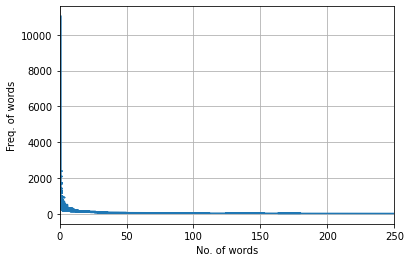

In [69]:
import matplotlib.pyplot as plt
y = f_o_w
x = n_o_w
plt.xlim(0,250)
plt.xlabel("No. of words")
plt.ylabel("Freq. of words")
plt.plot(x, y)
plt.grid()
plt.show()

In [70]:
#deciding the no. of words to use as feature

n = 5000
features = wrds[0:n]
print(features)

['writes', 'article', 'people', 'like', 'just', 'know', 'get', 'think', 'also', 'use', 'time', 'good', 'new', 'now', 'even', 'may', 'well', 'see', 'way', 'make', 'much', 'many', 'say', 'first', 'right', 'want', 'system', 'god', 'said', 'used', 'anyone', 'work', 'really', 'need', 'something', 'since', 'believe', 'please', 'still', 'problem', 'back', 'take', 'going', 'email', 'might', 'information', 'better', 'find', 'point', 'using', 'things', 'never', 'file', 'last', 'years', 'government', 'must', 'thanks', 'without', 'sure', 'someone', 'another', 'question', 'made', 'read', 'got', 'number', 'help', 'year', 'thing', 'etc', 'available', 'fact', 'university', 'program', 'look', 'windows', 'anything', 'come', 'part', 'world', 'however', 'data', 'around', 'little', 'case', 'drive', 'seems', 'probably', 'every', "ax'ax'ax'ax'ax'ax'ax'ax'ax'ax'ax'ax'ax'ax'ax", 'power', 'different', 'give', 'state', 'best', 'law', 'true', 'long', 'least', 'try', 'put', 'day', 'space', 'lot', 'enough', 'actual

In [71]:
#creating a dictionary that contains each document's vocabulary and ocurence of each word of the vocabulary 

dictionary = {}
doc_num = 1
for doc_words in list_of_words:
    #print(doc_words)
    np_doc_words = np.asarray(doc_words)
    w, c = np.unique(np_doc_words, return_counts=True)
    dictionary[doc_num] = {}
    for i in range(len(w)):
        dictionary[doc_num][w[i]] = c[i]
    doc_num = doc_num + 1

In [72]:
dictionary.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 22

In [99]:
#now we make a 2D array having the frequency of each word of our feature set in each individual documents

X_train = []
for k in dictionary.keys():
    row = []
    for f in features:
        if(f in dictionary[k].keys()):
            #if word f is present in the dictionary of the document as a key, its value is copied
            #this gives us no. of occurences
            row.append(dictionary[k][f]) 
        else:
            #if not present, the no. of occurences is zero
            row.append(0)
    X_train.append(row)

In [100]:
X_train = np.asarray(X_train)
Y_train = np.asarray(Y_train)

In [101]:
print(len(X_train))
# X_train = np.transpose(X_train)
print(len(Y_train))
# Y_train = np.transpose(Y_train)

14939
14997


In [79]:
list_of_words_test = []
import os

for document in doc_train:
        
        try:
          list_of_words_test.append(flatten(tokenize(document)))

        except UnicodeDecodeError:
          os.remove

In [80]:
dictionary_test = {}
doc_num = 1
for doc_words in list_of_words_test:
    #print(doc_words)
    np_doc_words = np.asarray(doc_words)
    w, c = np.unique(np_doc_words, return_counts=True)
    dictionary_test[doc_num] = {}
    for i in range(len(w)):
        dictionary_test[doc_num][w[i]] = c[i]
    doc_num = doc_num + 1

In [81]:
#now we make a 2D array having the frequency of each word of our feature set in each individual documents

X_test = []
for k in dictionary_test.keys():
    row = []
    for f in features:
        if(f in dictionary_test[k].keys()):
            #if word f is present in the dictionary of the document as a key, its value is copied
            #this gives us no. of occurences
            row.append(dictionary_test[k][f]) 
        else:
            #if not present, the no. of occurences is zero
            row.append(0)
    X_test.append(row)

In [82]:
X_test = np.asarray(X_test)
Y_test = np.asarray(Y_test)

In [94]:
len(X_test)

5000

In [93]:
X_test = np.transpose(X_test)

In [98]:
len(Y_test)

5000

In [96]:
Y_test = np.transpose(Y_test)

In [97]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
try:
  clf.fit(X_train, Y_train)

except ValueError:
  os.remove

clf.fit(X_train, Y_train)

ValueError: ignored

In [90]:
Y_predict = clf.predict(X_test)

NotFittedError: ignored